# **Introducción y selección de las variables**

Estamos trabajando con un dataset de una empresa que recolecta los datos de los relojes inteligentes y dispositivos moviles para procesarlos y ofrecer una plataforma de premios por alcanzar metas en la realización de retos deportivos.

Vamos a seleccionar cómo variables a explorar: **TotalElevationGainInMeters** y **TotalElevationLossInMeters**

**TotalElevationGainInMeters**: Ganancia total de elevación en metros.

**TotalElevationLossInMeters**: Pérdida total de elevación en metros.

# **Explicación de su importancia**

La elevación es un dato relevante dentro del contexto de Running, ya que la elevación impacta en el desempeño del deportista. El análisis de estas dos variables puede llevarnos a predecir patrones de ruta en los entrenamientos deportivos de los usuarios.




# **Código en Python con análisis bivariado y visualizaciones**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
#Código en Python con análisis univariado y visualizaciones
df = pd.read_excel('./DatasetActivities.xlsx', engine="openpyxl")
df.head()

In [ ]:
df_running = df[df["Type"] == "Running"]
df_running.head()

,Type,Name,StartTimeUtc,DurationInSeconds,DistanceInMeters,Steps,AverageSpeedInMetersPerSecond,AveragePaceInMinutesPerKilometer,TotalElevationGainInMeters,TotalElevationLossInMeters,AverageHeartRateInBeatsPerMinute,SourceType,SourceName,Warnings,CreationTime
UserId,,,,,,,,,,,,,,,
56226720,Running,Avellaneda Carrera,2024-09-30 20:36:15.0000000 +00:00,2308,6050.10,6802.0,2.622,6.356471,127.971985,128.66255,145.0,Garmin,Forerunner 35,NaN,2024-10-01 00:00:32.7421846 +00:00
33958672,Running,Malvinas Argentinas Carrera,2024-09-30 23:43:23.0000000 +00:00,232,557.72,600.0,2.399,6.947340,NaN,1.00000,91.0,Garmin,Forerunner 255S Music,DurationLessThanFiveMinutes,2024-10-01 00:00:37.8144259 +00:00
33958672,Running,Malvinas Argentinas Carrera,2024-09-30 23:53:23.0000000 +00:00,320,770.48,856.0,2.407,6.924248,3.000000,1.00000,114.0,Garmin,Forerunner 255S Music,NaN,2024-10-01 00:00:52.2962825 +00:00
39156304,Running,Córdoba Carrera,2024-09-30 23:26:07.0000000 +00:00,1895,5005.62,5254.0,2.642,6.308352,96.905790,107.28553,146.0,Garmin,Forerunner 45,NaN,2024-10-01 00:01:02.0718947 +00:00
10154408,Running,Rosario Carrera,2024-09-30 21:59:39.0000000 +00:00,4386,10376.22,11452.0,2.365,7.047216,71.099960,71.93257,143.0,Garmin,Forerunner 55,NaN,2024-10-01 00:01:30.1037912 +00:00


In [ ]:
print(df_running[['TotalElevationGainInMeters', 'TotalElevationLossInMeters']].describe())

       TotalElevationGainInMeters  TotalElevationLossInMeters
count               317879.000000               318270.000000
mean                   130.991368                  130.137395
std                   1961.576560                 1972.627785
min                      0.000000                    0.000000
25%                     11.150000                   11.000000
50%                     32.200000                   32.510000
75%                     82.000000                   83.829982
max                 784072.300000               783765.800000


In [ ]:
# Conversión a tipo numérico para los análisis
df_running["DurationInSeconds"] = pd.to_numeric(df_running["DurationInSeconds"], errors='coerce')
df_running["DistanceInMeters"] = pd.to_numeric(df_running["DistanceInMeters"], errors='coerce')
df_running["Steps"] = pd.to_numeric(df_running["Steps"], errors='coerce')
df_running["AverageSpeedInMetersPerSecond"] = pd.to_numeric(df_running["AverageSpeedInMetersPerSecond"], errors='coerce')
df_running["TotalElevationGainInMeters"] = pd.to_numeric(df_running["TotalElevationGainInMeters"], errors='coerce')
df_running["TotalElevationLossInMeters"] = pd.to_numeric(df_running["TotalElevationLossInMeters"], errors='coerce')
df_running["AveragePaceInMinutesPerKilometer"] = pd.to_numeric(df_running["AveragePaceInMinutesPerKilometer"], errors='coerce')
df_running["AverageHeartRateInBeatsPerMinute"] = pd.to_numeric(df_running["AverageHeartRateInBeatsPerMinute"], errors='coerce')

<ipython-input-6-9a82e33219af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_running["DurationInSeconds"] = pd.to_numeric(df_running["DurationInSeconds"], errors='coerce')
<ipython-input-6-9a82e33219af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_running["DistanceInMeters"] = pd.to_numeric(df_running["DistanceInMeters"], errors='coerce')
<ipython-input-6-9a82e33219af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

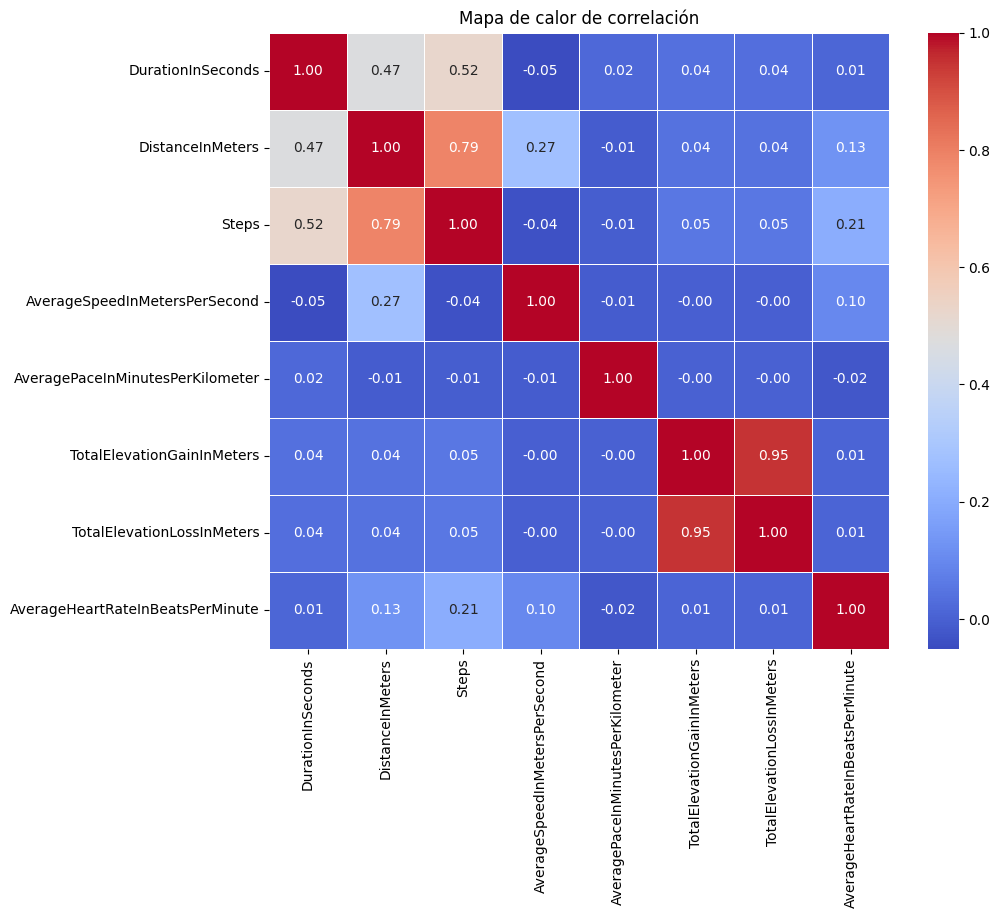

In [ ]:
df_running_numerico = df_running.select_dtypes(include=['number'])

correlacion = df_running_numerico.corr()
plt.figure(figsize=(10, 8))  # Ajustar tamaño de la figura
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlación")
plt.show()

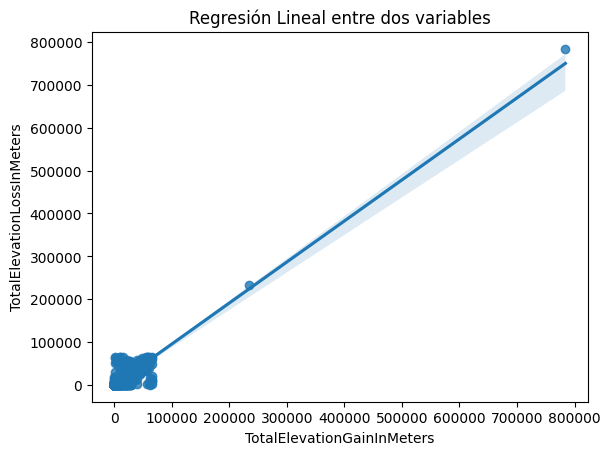

In [ ]:
sns.regplot(x=df_running["TotalElevationGainInMeters"], y=df_running["TotalElevationLossInMeters"])
plt.title("Regresión Lineal entre dos variables")
plt.show()

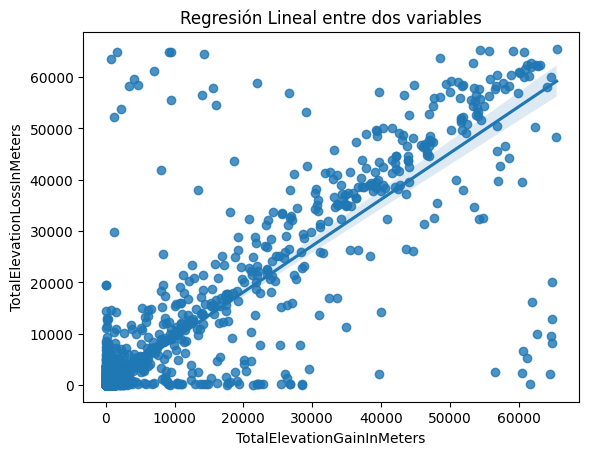

In [ ]:
df_running_prueba = df_running[(df_running["TotalElevationGainInMeters"] < 150000) & (df_running["TotalElevationLossInMeters"] < 150000)].copy()
sns.regplot(x=df_running_prueba["TotalElevationGainInMeters"], y=df_running_prueba["TotalElevationLossInMeters"])
plt.title("Regresión Lineal entre dos variables")
plt.show()

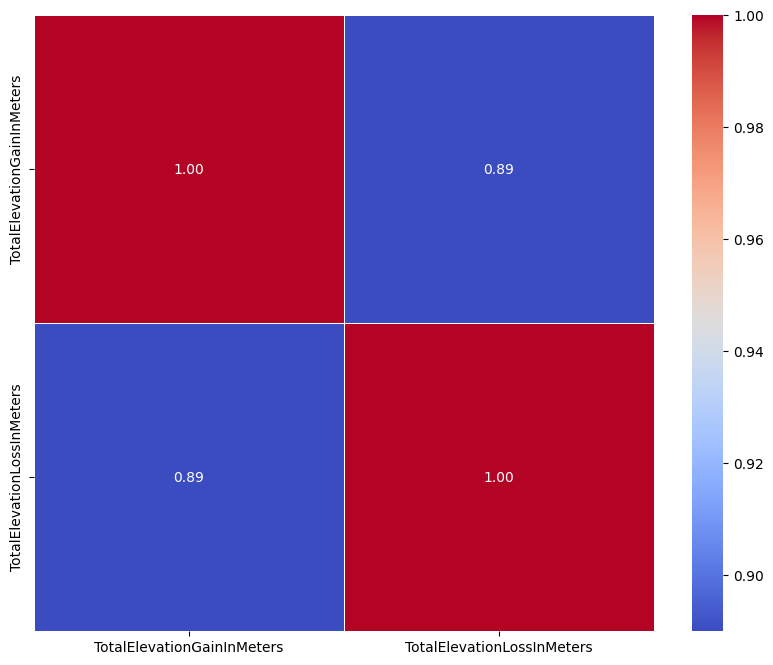

In [ ]:
df_running_prueba = df_running_prueba.select_dtypes(include=['number'])
correlacion2 = df_running_prueba[['TotalElevationGainInMeters', 'TotalElevationLossInMeters']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

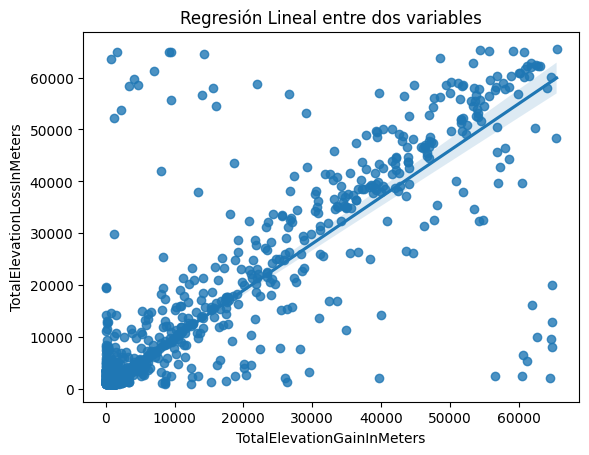

In [ ]:
df_running_prueba_bajada = df_running_prueba[df_running_prueba["TotalElevationLossInMeters"] > 1000]
sns.regplot(x=df_running_prueba_bajada["TotalElevationGainInMeters"], y=df_running_prueba_bajada["TotalElevationLossInMeters"])
plt.title("Regresión Lineal entre dos variables")
plt.show()

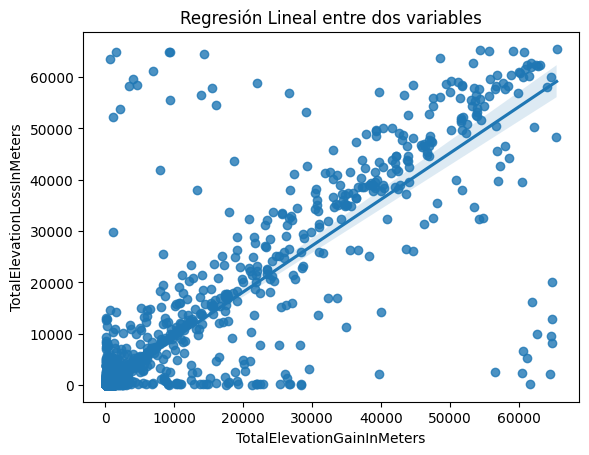

In [ ]:
df_running_prueba_subida = df_running_prueba[df_running_prueba["TotalElevationGainInMeters"] > 100]
sns.regplot(x=df_running_prueba_subida["TotalElevationGainInMeters"], y=df_running_prueba_subida["TotalElevationLossInMeters"])
plt.title("Regresión Lineal entre dos variables")
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

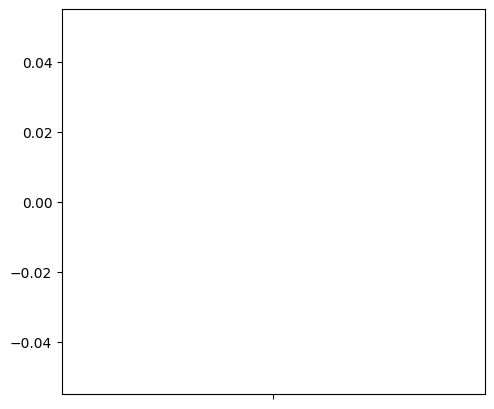

In [ ]:
# Todos los datos
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=df_running["TotalElevationGainInMeters"])
plt.title("Distribución de Ganancia de Elevación")

plt.subplot(1,2,2)
sns.boxplot(y=df_running["TotalElevationLossInMeters"])
plt.title("Distribución de Pérdida de Elevación")

plt.show()

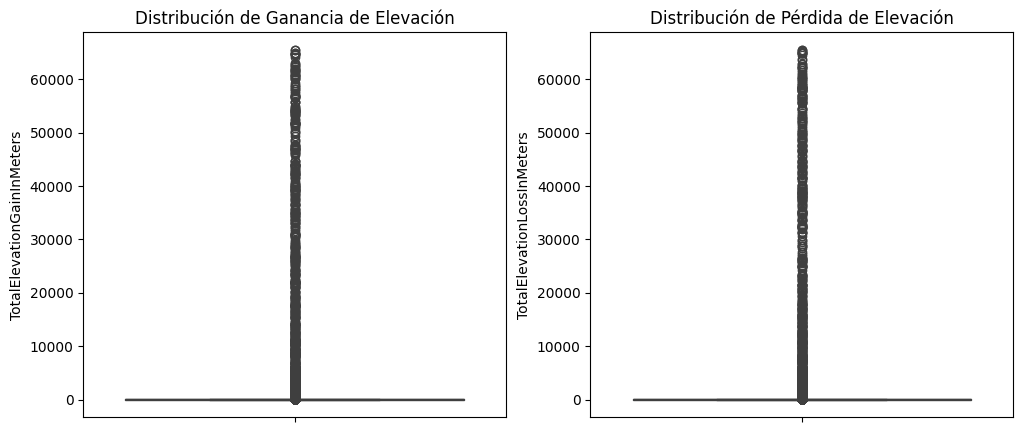

In [ ]:
# Eliminación de datos extremos
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=df_running_prueba["TotalElevationGainInMeters"])
plt.title("Distribución de Ganancia de Elevación")

plt.subplot(1,2,2)
sns.boxplot(y=df_running_prueba["TotalElevationLossInMeters"])
plt.title("Distribución de Pérdida de Elevación")

plt.show()

ValueError: Contour levels must be increasing

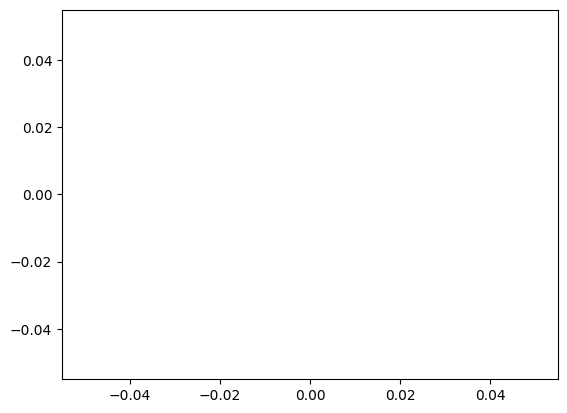

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_running_prueba = df_running_prueba.dropna(subset=["TotalElevationGainInMeters", "TotalElevationLossInMeters"])
sns.kdeplot(
    x=df_running_prueba["TotalElevationGainInMeters"].clip(lower=0.01),
    y=df_running_prueba["TotalElevationLossInMeters"].clip(lower=0.01),
    cmap="Blues", fill=True
)
plt.title("Gráfico de Densidad Bivariado")
plt.show()

# **Interpretación de los resultados**



# **Conclusiones**

- Las variables tienen correlación alta, lo que nos indica que si se usan como predictoras pra el modelo podemo tener problemas de colinealidad

- Las dos variables exhiben un comportamiento lineal, ya que a medida que aumenta la elevación ganada, también lo hace la elevación perdida. En este contexto, esto sugiere que la mayoría de las personas tienden a correr por el mismo recorrido de ida y vuelta, lo que explica por qué ambos valores suelen ser iguales o muy similares. Por lo tanto, los puntos que se desvían de la línea de tendencia reflejan una menor proporción de personas que optan por rutas diferentes para el regreso.

- Al analizar las gráficas de dispersión y boxplot, identificamos la presencia de valores atípicos que se desvían de la tendencia, algunos de los cuales superan los 100,000 metros (o 100 kilómetros) de elevación. Para evaluar su impacto, realizamos un experimento eliminándolos del dataset y observamos cómo cambiaba la correlación entre ambas variables. Como resultado, notamos que la correlación disminuyó en comparación con la prueba inicial. Esto podría deberse a que, al excluir los valores extremos, se da mayor peso a aquellos casos donde la elevación ganada y perdida presentan diferencias significativas.

- Los boxplot no entregan información que podamos analizar aparentemente porque la mayoría de los datos son pequeños y se tienen elevaciones muy grandes

- Un próximo análisis que nos permita obtener diferentes resultados sería samplear la muestra analizada del dataset de running para explorar otras alternativas.

- Podemos explorar la posibilidad de usar condicionales para los 3 casos que presenta el dataset
  - Solo elevación ganada
  - Solo elevación perdida
  - Ambos datos



**Grupo 4**
- ANDRES GARCIA SERNA
- LAURA CHAPARRO NAVIA
- FABIAN ORTIZ COLLAZOS
- JUAN CAMILO BERNAL MARIN
